# Sklearn - Treinando um modelo de classificação

## 🎯 Objetivo

O modelo será treinado para prever a variável `categoria` (que pode ser `"A"` ou `"B"`) com base nas demais colunas do dataset, após todo o pré-processamento que fizemos.

Treinar um modelo de **Regressão Logística** usando:
- Dados já pré-processados (`df_final`)
- Divisão entre dados de treino e teste
- Métricas de avaliação

### 🐍 Código - Importar Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from joblib import dump, load

### 🔖 Explicações

| Biblioteca / Classe                    | Finalidade Principal                                      |
|---------------------------------------|------------------------------------------------------------|
| `train_test_split`                    | Dividir dados em conjuntos de treino e teste              |
| `LogisticRegression`                  | Treinar um modelo de classificação                        |
| `accuracy_score`                      | Medir a porcentagem de acertos do modelo                  |
| `classification_report`               | Relatório detalhado com precisão, recall e f1-score       |
| `confusion_matrix`                    | Visualizar os tipos de erros do modelo                    |

### 🐍 Código

In [2]:
df = pd.read_csv('dataset/dataset_sudeste_simples_realista_outliers-2k.csv')
print(df.head())

   id  idade    renda          cidade categoria  nota feedback
0   1   39.0  5112.57  Belo Horizonte         A   4.5      Bom
1   2   64.0  9510.34  Belo Horizonte         B   5.4     Ruim
2   3   61.0  8970.80       São Paulo         B   5.0     Ruim
3   4   61.0  8526.52  Rio de Janeiro         A   1.8      Bom
4   5   53.0  3531.76         Vitória         B   5.5      Bom


### 🔖 Explicações

...

### 🐍 Código

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2000 non-null   int64  
 1   idade      1982 non-null   float64
 2   renda      1983 non-null   float64
 3   cidade     1988 non-null   object 
 4   categoria  1979 non-null   object 
 5   nota       1970 non-null   float64
 6   feedback   1975 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 109.5+ KB
None


### 🔖 Explicações

...

### 🐍 Código

In [4]:
print(df.describe())

                id        idade         renda         nota
count  2000.000000  1982.000000   1983.000000  1970.000000
mean   1000.500000    43.570131   7204.110968     4.965228
std     577.494589    16.166064   3573.795505     2.940147
min       1.000000     1.000000    422.990000    -3.700000
25%     500.750000    30.000000   4189.235000     2.500000
50%    1000.500000    44.000000   7079.250000     5.000000
75%    1500.250000    57.000000  10111.805000     7.300000
max    2000.000000   118.000000  33739.810000    14.600000


### 🔖 Explicações

...

### 🐍 Código

In [5]:
print(df.isnull().sum())

id            0
idade        18
renda        17
cidade       12
categoria    21
nota         30
feedback     25
dtype: int64


### 🔖 Explicações

...

### 🐍 Código - Preencher Valores Ausentes (Imputação)

In [6]:
imputer_media = SimpleImputer(strategy='mean')
df[['idade', 'nota']] = imputer_media.fit_transform(df[['idade', 'nota']])

### 🔖 Explicações

...

### 🐍 Código

In [7]:
imputer_mediana = SimpleImputer(strategy='median')
df[['renda']] = imputer_mediana.fit_transform(df[['renda']])

### 🔖 Explicações

...

### 🐍 Código -  Identificar e Lidar com Outliers

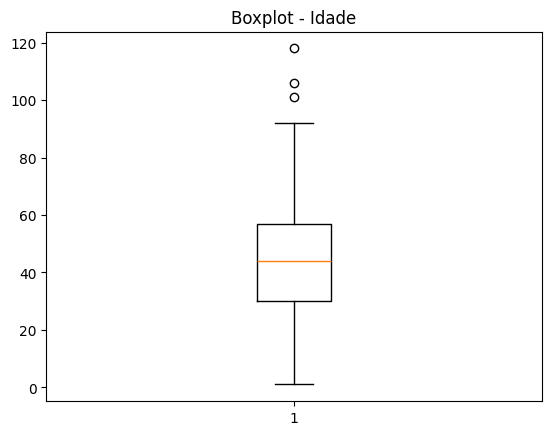

In [8]:
plt.boxplot(df['idade'])
plt.title("Boxplot - Idade")
plt.show()

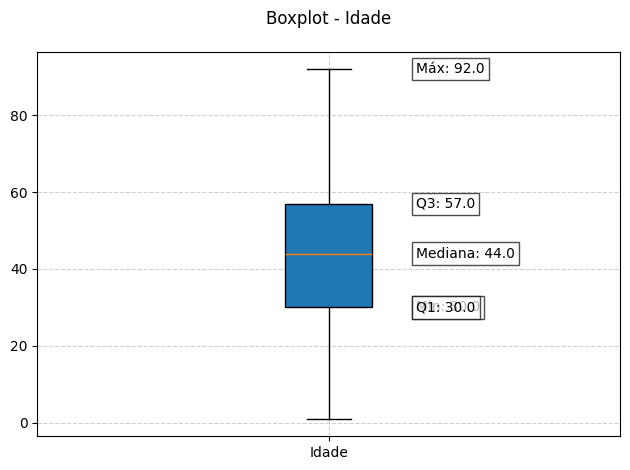

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Criar o boxplot e armazenar os dados retornados
bp = plt.boxplot(df['idade'], patch_artist=True, showfliers=False)

# 2. Extrair os valores estatísticos de forma compatível
# Obter os valores diretamente do cálculo do boxplot
stats = [item.get_ydata()[0] for item in bp['medians']]
median = stats[0]

# Para caixas e bigodes, precisamos acessar as coordenadas do Path
box = bp['boxes'][0]
box_path = box.get_path()
box_coords = box_path.vertices
q1 = np.min(box_coords[:, 1])
q3 = np.max(box_coords[:, 1])

whiskers = bp['whiskers']
min_valor = whiskers[0].get_ydata()[0]
max_valor = whiskers[1].get_ydata()[1]

# 3. Exibir os valores ao lado do boxplot
offset = 1.15  # Posição x do texto
props = {'verticalalignment': 'center', 'fontsize': 10, 
         'bbox': {'facecolor': 'white', 'alpha': 0.7, 'pad': 3}}

plt.text(offset, min_valor, f'Min: {min_valor:.1f}', **props)
plt.text(offset, q1, f'Q1: {q1:.1f}', **props)
plt.text(offset, median, f'Mediana: {median:.1f}', **props)
plt.text(offset, q3, f'Q3: {q3:.1f}', **props)
plt.text(offset, max_valor, f'Máx: {max_valor:.1f}', **props)

# 4. Ajustes finais do gráfico
plt.title("Boxplot - Idade", pad=20)
plt.xticks([1], ['Idade'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(0.5, 1.5)
plt.tight_layout()

plt.show()

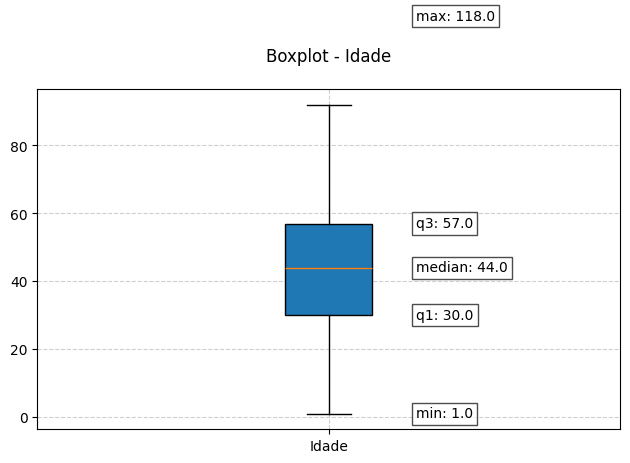

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular estatísticas manualmente
data = df['idade'].dropna()
stats = {
    'min': np.min(data),
    'q1': np.percentile(data, 25),
    'median': np.median(data),
    'q3': np.percentile(data, 75),
    'max': np.max(data)
}

# Criar boxplot
bp = plt.boxplot(data, patch_artist=True, showfliers=False)

# Adicionar textos
offset = 1.15
props = {'verticalalignment': 'center', 'fontsize': 10, 
         'bbox': {'facecolor': 'white', 'alpha': 0.7, 'pad': 3}}

for name, value in stats.items():
    plt.text(offset, value, f'{name}: {value:.1f}', **props)

# Formatação
plt.title("Boxplot - Idade", pad=20)
plt.xticks([1], ['Idade'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 🔖 Explicações

...

### 🐍 Código

In [11]:
Q1 = df['idade'].quantile(0.25)
Q3 = df['idade'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

### 🔖 Explicações

...

### 🐍 Código

In [12]:
df = df[(df['idade'] >= limite_inferior) & (df['idade'] <= limite_superior)]

### 🔖 Explicações

...

### 🐍 Código

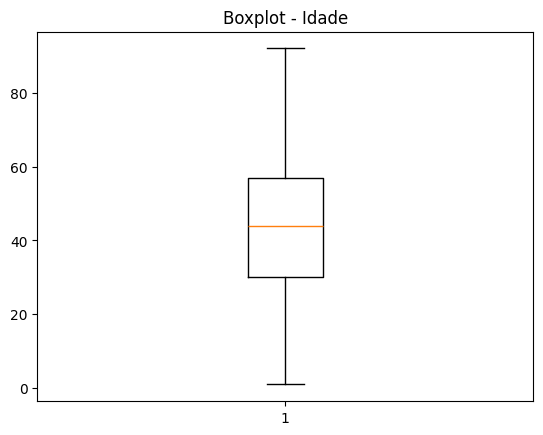

In [13]:
plt.boxplot(df['idade'])
plt.title("Boxplot - Idade")
plt.show()

### 🔖 Explicações

...

### 🐍 Código - Transformar Variáveis Categóricas
- Opção 1: One-Hot Encoding (para variáveis nominais)

In [14]:
#encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' evita multicolinearidade
encoder = OneHotEncoder(sparse_output=False)

#categorias_codificadas = encoder.fit_transform(df[['cidade', 'categoria', 'feedback']])
categorias_codificadas = encoder.fit_transform(df[['cidade', 'feedback']])

# Converter para DataFrame
#df_categorias = pd.DataFrame(categorias_codificadas, columns=encoder.get_feature_names_out(['cidade', 'categoria', 'feedback']))
df_categorias = pd.DataFrame(categorias_codificadas, columns=encoder.get_feature_names_out(['cidade', 'feedback']))

# Concatenar com o DataFrame original
df_final = pd.concat([df.reset_index(drop=True), df_categorias], axis=1)

# Remover as colunas originais categóricas
#df_final.drop(['cidade', 'categoria', 'feedback'], axis=1, inplace=True)
#df_final.drop(['cidade', 'feedback'], axis=1, inplace=True)

### 🔖 Explicações

...

### 🐍 Código - Normalizar ou Padronizar Dados Numéricos

In [15]:
scaler = StandardScaler()
df_final[['idade', 'renda', 'nota']] = scaler.fit_transform(df_final[['idade', 'renda', 'nota']])

### 🔖 Explicações

...

### 🐍 Código Revisando o dataset

In [16]:
print(df_final.isnull().sum())
print (f"\n\n")
print(df_final.head(10))
print (f"\n\n")
print(df_final.describe())

id                        0
idade                     0
renda                     0
cidade                   12
categoria                21
nota                      0
feedback                 25
cidade_Belo Horizonte     0
cidade_Rio de Janeiro     0
cidade_São Paulo          0
cidade_Vitória            0
cidade_nan                0
feedback_Bom              0
feedback_Regular          0
feedback_Ruim             0
feedback_nan              0
dtype: int64



   id     idade     renda          cidade categoria      nota feedback  \
0   1 -0.281282 -0.594385  Belo Horizonte         A -0.158811      Bom   
1   2  1.290886  0.660303  Belo Horizonte         B  0.150648     Ruim   
2   3  1.102226  0.506372       São Paulo         B  0.013110     Ruim   
3   4  1.102226  0.379618  Rio de Janeiro         A -1.087188      Bom   
4   5  0.599132 -1.045392         Vitória         B  0.185032      Bom   
5   6 -1.287470  0.084520  Rio de Janeiro         B -0.880882  Regular   
6   7 -1.539017 -1

### 🔖 Explicações

...

# Treinando o modelo de Regressão
Vamos treinar um modelo de classificação para prever a variável categoria (que pode ser "A" ou "B") com base nas demais colunas do dataset, após todo o pré-processamento que fizemos.

### 🐍 Código

In [17]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1997 non-null   int64  
 1   idade                  1997 non-null   float64
 2   renda                  1997 non-null   float64
 3   cidade                 1985 non-null   object 
 4   categoria              1976 non-null   object 
 5   nota                   1997 non-null   float64
 6   feedback               1972 non-null   object 
 7   cidade_Belo Horizonte  1997 non-null   float64
 8   cidade_Rio de Janeiro  1997 non-null   float64
 9   cidade_São Paulo       1997 non-null   float64
 10  cidade_Vitória         1997 non-null   float64
 11  cidade_nan             1997 non-null   float64
 12  feedback_Bom           1997 non-null   float64
 13  feedback_Regular       1997 non-null   float64
 14  feedback_Ruim          1997 non-null   float64
 15  feed

### 🔖 Explicações

...

### 🐍 Código

In [18]:
# df = df.dropna(subset=['categoria'])
df_final = df_final.dropna()

### 🔖 Explicações

...

### 🐍 Código

In [19]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1939 entries, 0 to 1996
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1939 non-null   int64  
 1   idade                  1939 non-null   float64
 2   renda                  1939 non-null   float64
 3   cidade                 1939 non-null   object 
 4   categoria              1939 non-null   object 
 5   nota                   1939 non-null   float64
 6   feedback               1939 non-null   object 
 7   cidade_Belo Horizonte  1939 non-null   float64
 8   cidade_Rio de Janeiro  1939 non-null   float64
 9   cidade_São Paulo       1939 non-null   float64
 10  cidade_Vitória         1939 non-null   float64
 11  cidade_nan             1939 non-null   float64
 12  feedback_Bom           1939 non-null   float64
 13  feedback_Regular       1939 non-null   float64
 14  feedback_Ruim          1939 non-null   float64
 15  feedback_

### 🔖 Explicações

### 🐍 Código

In [20]:
df_final.to_csv('./dataset-fase01/dataset_tratado_sudeste_realista_outliers-fase1.csv', index=False)

In [29]:
# X = todas as colunas, exceto 'categoria'
#X = df_final.drop('categoria', axis=1)
X = df_final[['idade','renda','nota']]

# y = a coluna que queremos prever
y = df_final['categoria']

### 🔖 Explicações

Prepara os dados para um modelo de **machine learning** separando:

- As **variáveis explicativas (features)** → armazenadas em `X`
- A **variável alvo (target)** → armazenada em `y`
- **`axis=1`**: significa que estamos removendo uma **coluna**, não uma linha.

Ou seja:
- `X`: o que o modelo usa para aprender
- `y`: o que o modelo deve prever

**Resumo**:

| Variável | O que representa                          | Tipo             |
|---------|--------------------------------------------|------------------|
| `X`     | Dados de entrada (features)                | DataFrame        |
| `y`     | Valor que queremos prever (target)         | Série (coluna)   |

### 🐍 Código

In [31]:
print(f"\n\nFeatures \n\n{X.head(5)} \n")



Features 

      idade     renda      nota
0 -0.281282 -0.594385 -0.158811
1  1.290886  0.660303  0.150648
2  1.102226  0.506372  0.013110
3  1.102226  0.379618 -1.087188
4  0.599132 -1.045392  0.185032 



In [32]:
print(f"\n\nTarget \n\n{y.head(5)} \n")



Target 

0    A
1    B
2    B
3    A
4    B
Name: categoria, dtype: object 



### 🔖 Explicações

...

### 🐍 Código - Dividir os dados em conjuntos de treino e teste

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,     # 20% dos dados serão usados para teste
    random_state=42,   # garantir reprodutibilidade
    stratify=y         # manter proporção das classes em treino e teste
)

### 🔖 Explicações

Esse código divide os dados em dois grupos:
- Conjunto de treino (X_train, y_train) : usado para treinar o modelo
- Conjunto de teste (X_test, y_test) : usado para avaliar como o modelo se sai com dados novos e não vistos

> ⚠️ O parâmetro `stratify=y` garante que a proporção de `"A"` e `"B"` seja mantida nos conjuntos de treino e teste.

| Parte | O que faz |
|------|-----------|
| `train_test_split(...)` | Função que divide os dados em conjuntos de treino e teste |
| `X, y` | São os dados de entrada (features) e o alvo (o que queremos prever) |
| `test_size=0.2` | Define que **20% dos dados** vão para o conjunto de teste (80% para treino) |
| `random_state=42` | Garante que a divisão seja **sempre a mesma** (para reprodutibilidade) |
| `stratify=y` | Mantém a **mesma proporção de classes** em `y` nos conjuntos de treino e teste |

Se você tem 100 registros e `test_size=0.2`:

- **80 registros** vão para treino (`X_train`, `y_train`)
- **20 registros** vão para teste (`X_test`, `y_test`)

E com `stratify=y`, se 60% dos dados são `"A"` e 40% são `"B"`, essa proporção será mantida nos dois conjuntos.

💡 **Por que isso é importante?**

- **Evita overfitting**: Treinar e testar com os mesmos dados pode levar a um modelo que "decora" as respostas.

- **Reprodutibilidade**: Com `random_state`, você garante que outros obtenham os mesmos resultados.

- **Proporção balanceada**: Com `stratify=y`, o modelo é avaliado com base em uma amostra representativa.

### 🐍 Código

In [36]:
print (f"Dados de Treino - Features \n\n{X_train.head(5)} \n\n\n")
print (f"Dados de Treino - Targets \n\n{y_train.head(5)} \n\n\n")

print (f"Dados de Teste - Features \n\n{X_test.head(5)} \n\n\n")
print (f"Dados de Teste - Targets \n\n{y_test.head(5)} \n\n\n")

Dados de Treino - Features 

         idade     renda      nota
775   0.787792 -0.376295  1.010255
121   1.605320  0.312590 -0.743344
39   -0.155509  1.579380  1.422867
1779 -0.532829 -0.450833 -1.224725
1035 -1.035923 -0.130374  0.081879 



Dados de Treino - Targets 

775     A
121     A
39      A
1779    A
1035    A
Name: categoria, dtype: object 



Dados de Teste - Features 

         idade     renda      nota
86    0.976452  1.460592  0.941487
1127  1.353773 -1.395869 -0.502654
275   1.479546  0.064064 -0.949650
376   0.410472  1.372180  1.629173
405   0.221812  0.415940  1.216561 



Dados de Teste - Targets 

86      B
1127    A
275     A
376     A
405     B
Name: categoria, dtype: object 





### 🔖 Explicações

...

## Criar e treinar o modelo de Regressão Logística
- Este código **cria e treina** um modelo de **Regressão Logística**, que é um algoritmo comum usado para **classificação** (por exemplo: prever se algo é `"A"` ou `"B"`).

### 🐍 Código

In [38]:
modelo = LogisticRegression(max_iter=1000)  

# Treinando o modelo
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### 🔖 Explicações

> ⚠️ `max_iter=1000`: algumas vezes a regressão logística precisa de mais iterações para convergir; aumentamos esse limite para evitar avisos.

O modelo aprende as relações entre as **variáveis de entrada** (`X_train`) e a **variável de saída** (`y_train`), para depois fazer previsões.

| Parte do código              | Finalidade                                     |
|-----------------------------|------------------------------------------------|
| `LogisticRegression(...)`   | Cria o modelo de classificação                 |
| `max_iter=1000`             | Garante que o modelo tente convergir melhor    |
| `.fit(X_train, y_train)`    | Ensina o modelo com os dados de treino         |

### 🐍 Código - Fazer previsões no conjunto de teste
- Esse código usa um modelo de machine learning já treinado para fazer previsões em novos dados (neste caso, os dados de teste).

In [39]:
y_pred = modelo.predict(X_test)

### 🔖 Explicações

- **`X_test`**: são os dados de entrada que o modelo **nunca viu antes** (dados de teste).
- **`.predict()`**: é o método usado para o modelo **prever resultados** com base nesses novos dados.
- **`y_pred`**: é onde armazenamos as **previsões feitas pelo modelo** (ou seja, quais valores ele acha que `y` deve ter para cada linha de `X_test`).

Se o modelo foi treinado para prever se um cliente pertence à categoria `"A"` ou `"B"`, então:

- `X_test`: são os dados desses clientes que o modelo não viu durante o treino
- `y_pred`: será uma lista com as **previsões** do modelo para cada cliente:  
  Exemplo: `['A', 'B', 'B', 'A', ...]`

## Avaliar o desempenho do modelo

### 🐍 Código -Acurácia: porcentagem de acertos 
- Este código **avalia o desempenho** de um modelo de machine learning, medindo a **porcentagem de acertos** nas previsões feitas em dados de teste.

In [40]:
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {acuracia:.2f}')

Acurácia do modelo: 0.49


### 🔖 Explicações

- **`accuracy_score()`**: é uma função do Scikit-learn que calcula a **acurácia**, ou seja, a porcentagem de previsões corretas.
- **`y_test`**: são os valores reais (corretos) que o modelo deveria prever.
- **`y_pred`**: são as previsões feitas pelo modelo.
- **Resultado:** um número entre 0 e 1 (ex: `0.85` = 85% de acerto)

Esse é um dos métodos mais simples e comuns para avaliar modelos de classificação.

### 🐍 Código - Relatório completo: precisão, recall, f1-score
Este código mostra um **relatório completo com métricas de avaliação** do modelo de classificação.

Ele vai além da acurácia e mostra:
- **Precisão**
- **Recall (ou sensibilidade)**
- **F1-score**
- **Suporte** (quantidade de amostras por classe)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.47      0.34      0.40       189
           B       0.50      0.63      0.56       199

    accuracy                           0.49       388
   macro avg       0.48      0.49      0.48       388
weighted avg       0.49      0.49      0.48       388



### 🔖 Explicações

- **`classification_report()`**:  
  Função do Scikit-learn que gera um relatório com as métricas acima para cada classe (`"A"` e `"B"` no seu caso).

- **`y_test`**:  
  Os valores reais (corretos) do target.

- **`y_pred`**:  
  As previsões feitas pelo modelo.

| Métrica       | O que mede? |
|---------------|-------------|
| **Precision** | Dos que o modelo disse ser `"A"`, quantos realmente eram `"A"`? |
| **Recall**    | Dos que realmente eram `"A"`, quantos o modelo acertou? |
| **F1-score**  | Média entre precisão e recall (boa para dados desbalanceados) |
| **Support**   | Quantas amostras tinham em cada classe |

A **accuracy** (acurácia) é a porcentagem de previsões corretas feitas pelo modelo, ou seja, quantos resultados ele acertou em relação ao total. 

Já o **macro avg** é a média das métricas (como precisão, recall e F1-score) calculada sem considerar o número de amostras por classe, dando o mesmo peso para cada classe — o que é útil quando você quer avaliar classes minoritárias. 

Por outro lado, o **weighted avg** também calcula a média dessas métricas, mas leva em conta a proporção de amostras em cada classe , dando mais peso às classes maiores, o que pode ser mais representativo quando as classes estão desbalanceadas. 

Essas métricas ajudam a entender melhor o desempenho do modelo além da acurácia geral.

### 🐍 Código - Matriz de confusão (visualização dos erros)
Este código exibe a **matriz de confusão**, que é uma tabela que mostra **quantas previsões foram corretas ou incorretas** em cada classe.

In [43]:
print(confusion_matrix(y_test, y_pred))

[[ 65 124]
 [ 74 125]]


### 🔖 Explicações

🔍 **O que cada parte faz**:

- **`confusion_matrix()`**:  
  Função do Scikit-learn que calcula a matriz de confusão com base nos valores reais (`y_test`) e nas previsões do modelo (`y_pred`).

- **`y_test`**:  
  Os valores reais (corretos) que o modelo deveria prever.

- **`y_pred`**:  
  As previsões feitas pelo modelo nos dados de teste.


  **Isso significa**:

|                | Previsto como A | Previsto como B |
|----------------|------------------|------------------|
| **Realmente A** | 56 (Verdadeiro Positivo) | 45 (Falso Negativo) |
| **Realmente B** | 47 (Falso Positivo)       | 51 (Verdadeiro Negativo) |

A matriz de confusão ajuda a entender **onde o modelo errou e acertou**, mostrando:
- Quantos ele acertou por classe
- Quantos ele confundiu entre as classes


## Salvar o modelo treinado em um arquivo
No Scikit-learn, os modelos podem ser salvos usando:

- `joblib`: mais eficiente para objetos grandes (como modelos de ML)
- `pickle`: método mais antigo, mas também funcional

Vamos usar o `joblib`, por ser mais rápido nesse caso.

### 🐍 Código

In [45]:
dump(modelo, 'modelo_regressao_logistica.joblib')
print("\nModelo salvo como 'modelo_regressao_logistica.joblib'")


Modelo salvo como 'modelo_regressao_logistica.joblib'


### 🔖 Explicações

A linha `dump(modelo, 'modelo_regressao_logistica.joblib')` é usada para salvar um modelo de machine learning treinado em um arquivo no disco. 

Ela faz parte da biblioteca joblib, que permite serializar e salvar objetos do Python — especialmente úteis para modelos grandes e complexos, como os criados com o Scikit-learn. 

Nesse caso, o modelo chamado modelo (no exemplo, um modelo de Regressão Logística) é salvo no arquivo 'modelo_regressao_logistica.joblib', permitindo que ele seja reutilizado posteriormente sem a necessidade de treiná-lo novamente, bastando carregá-lo com a função load() do próprio joblib.

### 📦 Como carregar o modelo depois (opcional)

### 🐍 Código

In [ ]:
# Importa o modulo utilizado para a leiruta
from joblib import dump

# Carregar o modelo
modelo_carregado = load('modelo-treinado/modelo_regressao_logistica.joblib')

# Usar o modelo para prever novos dados
#novas_previsoes = modelo_carregado.predict(X_novo)

### 🔖 Explicações

| Etapa | Finalidade |
|-------|------------|
| `from joblib import dump` | Importa a ferramenta para salvar o modelo |
| `dump(modelo, 'nome_do_arquivo.joblib')` | Salva o modelo treinado em um arquivo |
| Futuro `load(...)` | Permite recarregar o modelo em outro momento |

### 🐍 Código

In [ ]:
#

### 🔖 Explicações

...

### 🐍 Código

In [ ]:
#

### 🔖 Explicações

...

### 🐍 Código

In [ ]:
#

### 🔖 Explicações

...

### 🐍 Código

In [ ]:
#

### 🔖 Explicações

...

### 🐍 Código

In [ ]:
#

### 🔖 Explicações

...

### 🐍 Código

In [ ]:
#

### 🔖 Explicações

...